In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
advertising_data=pd.read_csv(r"advertising.csv")
advertising_data


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
advertising_data.shape


(200, 4)

In [4]:
advertising_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
advertising_data.keys()

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [7]:
advertising_data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

**there is no any null values data is clean**

In [8]:
X=advertising_data.drop("Sales",axis=1)
y=advertising_data["Sales"]
print(f"Input_Colunms:")
print(X)
print(f"Output_column:")
print(y)

Input_Colunms:
        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]
Output_column:
0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64


In [9]:
X.values


array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4],
       [  8.7,  48.9,  75. ],
       [ 57.5,  32.8,  23.5],
       [120.2,  19.6,  11.6],
       [  8.6,   2.1,   1. ],
       [199.8,   2.6,  21.2],
       [ 66.1,   5.8,  24.2],
       [214.7,  24. ,   4. ],
       [ 23.8,  35.1,  65.9],
       [ 97.5,   7.6,   7.2],
       [204.1,  32.9,  46. ],
       [195.4,  47.7,  52.9],
       [ 67.8,  36.6, 114. ],
       [281.4,  39.6,  55.8],
       [ 69.2,  20.5,  18.3],
       [147.3,  23.9,  19.1],
       [218.4,  27.7,  53.4],
       [237.4,   5.1,  23.5],
       [ 13.2,  15.9,  49.6],
       [228.3,  16.9,  26.2],
       [ 62.3,  12.6,  18.3],
       [262.9,   3.5,  19.5],
       [142.9,  29.3,  12.6],
       [240.1,  16.7,  22.9],
       [248.8,  27.1,  22.9],
       [ 70.6,  16. ,  40.8],
       [292.9,  28.3,  43.2],
       [112.9,  17.4,  38.6],
       [ 97.2,   1.5,  30. ],
       [26

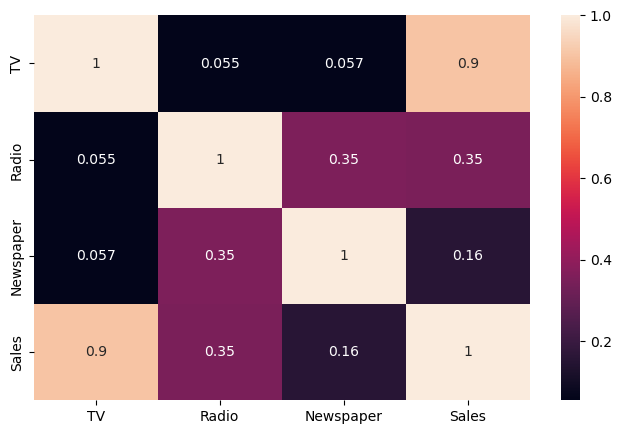

In [10]:
plt.figure(figsize=(8,5))
corr=advertising_data.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [12]:
vif=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data=pd.DataFrame(vif,index=X.columns,columns=['VIF'])
vif_data.sort_values(by='VIF',ascending=False)

,VIF
Radio,3.285462
Newspaper,3.055245
TV,2.486772


**Above we can see that the multicollinearity is in moderate because the vif values are less than 5**

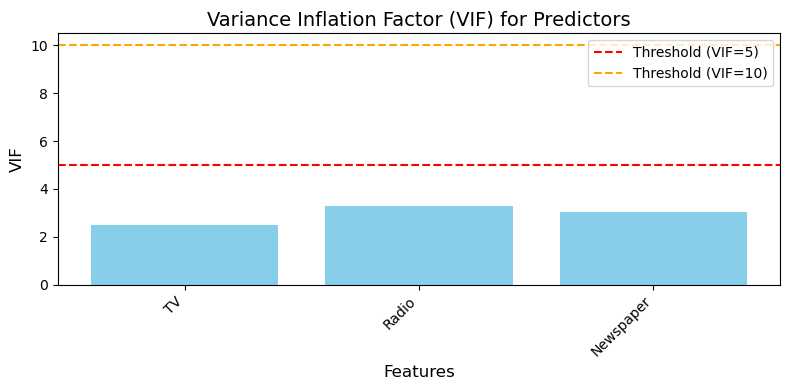

In [13]:
plt.figure(figsize=(8, 4))
plt.bar(vif_data.index, vif_data['VIF'], color='skyblue')
plt.axhline(y=5, color='red', linestyle='--', label='Threshold (VIF=5)')
plt.axhline(y=10, color='orange', linestyle='--', label='Threshold (VIF=10)')
plt.title('Variance Inflation Factor (VIF) for Predictors', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('VIF', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data = scaler.fit_transform(X)
scaled_data

array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00],
       [-1.43908760e+00,  7.99208859e-01,  1.62704048e+00],
       [-5.78501712e-01, -1.05768905e+00, -1.07502697e+00],
       [ 6.66253447e-01,  6.50657027e-01,  7.11007392e-01],
       [ 5.64664612e-01,  1.65000572e+00,  1.02862691e+00],
       [-9.25304978e-01,  9.00494200e-01

In [17]:
scale_df = pd.DataFrame(scaled_data, columns=X.columns)
scale_df

,TV,Radio,Newspaper
0,0.969852,0.981522,1.778945
1,-1.197376,1.082808,0.669579
2,-1.516155,1.528463,1.783549
3,0.052050,1.217855,1.286405
4,0.394182,-0.841614,1.281802
...,...,...,...
195,-1.270941,-1.321031,-0.771217
196,-0.617035,-1.240003,-1.033598
197,0.349810,-0.942899,-1.111852
198,1.594565,1.265121,1.640850


In [18]:
########################################### train_test_split###########################################
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=(train_test_split(scale_df,
                                                y,
                                                test_size=0.2,
                                                random_state=90))

In [19]:
X_train.shape

(160, 3)

In [20]:
y_train.shape

(160,)

In [21]:
X_test.shape

(40, 3)

In [22]:
y_test.shape

(40,)

In [23]:
########################### Development #######################
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [29]:
########################## Prediction ##############################3
y_pred=lr.predict(X_test)
y_pred


array([18.19129792, 20.24305299, 10.84463048, 12.96095881, 20.84264339,
        8.96014932, 12.92007623, 10.12712395, 12.00042557, 11.90167636,
       17.79969796, 12.62614101, 11.83801605, 13.36556073, 17.29955803,
       15.41934567, 12.28431762,  9.70636828, 11.04429557, 20.58681494,
       11.15227362, 21.55809247, 18.29885252, 20.60919184, 15.5137317 ,
       14.8030737 , 21.18479945, 17.10732219, 16.58641403, 20.59379058,
       12.14693013,  7.14123085, 10.83938078, 15.97114877,  8.9574022 ,
       21.17270871, 16.91061339, 18.29912704, 15.97784174, 14.14356785])

In [24]:
###################### Coefficient #####################################
lr.coef_

array([ 4.74513952,  1.50844246, -0.05001452])

In [28]:
########################## Intercept ####################################
lr.intercept_

15.126148222268569

In [30]:
######################## Metrics ######################################
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mse

2.4908897502067666

In [56]:

from sklearn.metrics import r2_score
R_Square=r2_score(y_test,y_pred)
rmse=np.sqrt(mse)
print("MSe:",mse)
print("rmse:",rmse)
print("r2_score:",R_Square)


MSe: 2.4908897502067666
rmse: 1.578255286766614
r2_score: 0.8484777299118098


In [57]:
lr

LinearRegression()

In [60]:
import pickle
path=open('LinearRegression_sales.pkl','wb')
pickle.dump(lr,path)

In [61]:
with open('LinearRegression_sales.pkl','wb') as file:
    pickle.dump(lr,file)

In [62]:
import os

# Get the current working directory
current_directory = os.getcwd()
print(f"The .pkl file is saved in: {current_directory}")


The .pkl file is saved in: C:\Users\Vaishnavi\Documents\Naresh IT\project on Linear Regressin sales prediction
